In [58]:
from itertools import count

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 항공권 Dataset

In [59]:
# 01. 데이터 수집 및 로딩
df = pd.read_csv('data/synthetic_flight_passenger_data.csv')
df.head()

,Passenger_ID,Flight_ID,Airline,Departure_Airport,Arrival_Airport,Departure_Time,Flight_Duration_Minutes,Flight_Status,Distance_Miles,Price_USD,...,Bags_Checked,Frequent_Flyer_Status,Check_in_Method,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Seat_Selected,Booking_Lead_Time
0,P1,F68,Southwest,JFK,ATL,2024-03-27 06:22:06,161,On-time,803,148.42,...,2,Platinum,Online,8.801356,0.0,91,1,1,Window,102
1,P2,F1687,Southwest,JFK,DFW,2024-12-28 09:18:06,130,On-time,1605,228.57,...,1,Gold,Airport Kiosk,9.094380,2.0,45,0,0,Middle,51
2,P3,F1745,United,ORD,ORD,2024-05-23 23:28:20,169,On-time,908,232.45,...,0,Silver,Airport Kiosk,8.015235,0.0,63,0,0,Middle,92
3,P4,F1514,Delta,SEA,ORD,2023-10-31 08:09:27,227,On-time,63,526.43,...,0,Platinum,Online,7.544133,9.0,57,0,1,Window,14
4,P5,F1753,Southwest,LAX,JFK,2025-01-17 22:21:13,150,On-time,628,324.14,...,2,Silver,Desk,7.133140,3.0,58,0,0,Middle,106


In [61]:
# 02. 데이터 구조 및 변수 이해
print(df.info())    # 변수 타입 확인
display(df.head())  # 레코드 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Passenger_ID               10000 non-null  object 
 1   Flight_ID                  10000 non-null  object 
 2   Airline                    10000 non-null  object 
 3   Departure_Airport          10000 non-null  object 
 4   Arrival_Airport            10000 non-null  object 
 5   Departure_Time             10000 non-null  object 
 6   Flight_Duration_Minutes    10000 non-null  int64  
 7   Flight_Status              10000 non-null  object 
 8   Distance_Miles             10000 non-null  int64  
 9   Price_USD                  10000 non-null  float64
 10  Age                        10000 non-null  int64  
 11  Gender                     10000 non-null  object 
 12  Income_Level               10000 non-null  object 
 13  Travel_Purpose             10000 non-null  obje

,Passenger_ID,Flight_ID,Airline,Departure_Airport,Arrival_Airport,Departure_Time,Flight_Duration_Minutes,Flight_Status,Distance_Miles,Price_USD,...,Bags_Checked,Frequent_Flyer_Status,Check_in_Method,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Seat_Selected,Booking_Lead_Time
0,P1,F68,Southwest,JFK,ATL,2024-03-27 06:22:06,161,On-time,803,148.42,...,2,Platinum,Online,8.801356,0.0,91,1,1,Window,102
1,P2,F1687,Southwest,JFK,DFW,2024-12-28 09:18:06,130,On-time,1605,228.57,...,1,Gold,Airport Kiosk,9.094380,2.0,45,0,0,Middle,51
2,P3,F1745,United,ORD,ORD,2024-05-23 23:28:20,169,On-time,908,232.45,...,0,Silver,Airport Kiosk,8.015235,0.0,63,0,0,Middle,92
3,P4,F1514,Delta,SEA,ORD,2023-10-31 08:09:27,227,On-time,63,526.43,...,0,Platinum,Online,7.544133,9.0,57,0,1,Window,14
4,P5,F1753,Southwest,LAX,JFK,2025-01-17 22:21:13,150,On-time,628,324.14,...,2,Silver,Desk,7.133140,3.0,58,0,0,Middle,106


In [62]:
# 03. 데이터 요약 및 기술 통계
df.describe()

,Flight_Duration_Minutes,Distance_Miles,Price_USD,Age,Bags_Checked,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Booking_Lead_Time
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,180.156100,1199.178500,349.008031,48.590500,0.993200,7.722048,9.975000,59.936800,0.051100,0.150700,59.820300
std,60.304822,302.818297,99.824544,18.019858,0.993404,0.847221,9.905311,34.695827,0.220213,0.357774,35.029669
min,-78.000000,-10.000000,-40.620000,18.000000,0.000000,4.630153,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,998.000000,282.615000,33.000000,0.000000,7.134095,3.000000,30.000000,0.000000,0.000000,29.000000
50%,180.000000,1194.500000,349.840000,49.000000,1.000000,7.688090,7.000000,61.000000,0.000000,0.000000,59.000000
75%,221.000000,1400.000000,415.270000,64.000000,2.000000,8.291409,14.000000,90.000000,0.000000,0.000000,90.000000
max,442.000000,2558.000000,830.440000,79.000000,6.000000,10.000000,87.000000,119.000000,1.000000,1.000000,120.000000


In [63]:
# 범주형 변수의 분포 파악
df.nunique()
# 연속형 변수 -> (Departure_Time->아침시간, 저녁시간 등으로 변경? ex.오전6시30분 -> 390, 오후5시15분->1035), Distance_Miles, Price_USD, Age, (Flight_Satisfaction_Score->target변수)

Passenger_ID                 10000
Flight_ID                     1992
Airline                          5
Departure_Airport                8
Arrival_Airport                  8
Departure_Time                9999
Flight_Duration_Minutes        371
Flight_Status                    3
Distance_Miles                1500
Price_USD                     8775
Age                             62
Gender                           2
Income_Level                     3
Travel_Purpose                   4
Seat_Class                       4
Bags_Checked                     7
Frequent_Flyer_Status            3
Check_in_Method                  4
Flight_Satisfaction_Score     9940
Delay_Minutes                   78
Booking_Days_In_Advance        120
No_Show                          2
Weather_Impact                   2
Seat_Selected                    3
Booking_Lead_Time              121
dtype: int64

In [64]:
df['Airline'].value_counts()    # 항공사

Airline
American Airlines    2065
United               2000
Delta                1994
JetBlue              1982
Southwest            1959
Name: count, dtype: int64

In [65]:
df['Departure_Airport'].value_counts()  # 출발 공항

Departure_Airport
LAX    1287
DEN    1263
JFK    1260
SFO    1247
SEA    1243
ATL    1237
DFW    1233
ORD    1230
Name: count, dtype: int64

In [66]:
df['Arrival_Airport'].value_counts()    # 도착 공항

Arrival_Airport
ORD    1282
LAX    1281
DFW    1271
JFK    1260
SFO    1250
DEN    1245
SEA    1237
ATL    1174
Name: count, dtype: int64

In [67]:
df['Flight_Status'].value_counts()  # 연착 여부

Flight_Status
On-time      7998
Delayed      1472
Cancelled     530
Name: count, dtype: int64

In [68]:
df['Gender'].value_counts() # 성별

Gender
Male      5240
Female    4760
Name: count, dtype: int64

In [69]:
df['Income_Level'].value_counts()   # 소득분위

Income_Level
Medium    4987
Low       2992
High      2021
Name: count, dtype: int64

In [70]:
df['Travel_Purpose'].value_counts() # 여행 목적

Travel_Purpose
Business     2554
Emergency    2508
Family       2477
Leisure      2461
Name: count, dtype: int64

In [71]:
df['Seat_Class'].value_counts() # 좌석 등급

Seat_Class
Economy            5992
Premium Economy    2005
Business           1484
First               519
Name: count, dtype: int64

In [72]:
df['Bags_Checked'].value_counts()   # 수하물 개수
# count가 적은 레코드, 4, 5, 6은 3에 통합? 일단X

Bags_Checked
0    3714
1    3640
2    1861
3     605
4     149
5      27
6       4
Name: count, dtype: int64

In [73]:
df['Frequent_Flyer_Status'].value_counts()  # 회원 등급

Frequent_Flyer_Status
Silver      2550
Gold        1488
Platinum    1014
Name: count, dtype: int64

In [74]:
df['Check_in_Method'].value_counts()    # 체크인 수단

Check_in_Method
Desk             2542
Online           2529
Mobile App       2469
Airport Kiosk    2460
Name: count, dtype: int64

In [75]:
df['No_Show'].value_counts()    # 노쇼 여부
# 불균형이 너무 심함 -> 제거 고려

No_Show
0    9489
1     511
Name: count, dtype: int64

In [76]:
df['Weather_Impact'].value_counts() # 날씨 영향
# 불균형이 심함 -> 제거 고려

Weather_Impact
0    8493
1    1507
Name: count, dtype: int64

In [77]:
df['Seat_Selected'].value_counts()  # 좌석 위치(창가/중앙/통로)

Seat_Selected
Window    3390
Aisle     3363
Middle    3247
Name: count, dtype: int64

In [119]:
# 자이제 타겟따로 수치형따로 범주형따로 분류할게요
target = df['Flight_Satisfaction_Score']
soochi = ['Distance_Miles', 'Price_USD', 'Age', 'Booking_Days_In_Advance', 'Booking_Lead_Time']
bumzu = ['Airline', 'Departure_Airport', 'Arrival_Airport', 'Flight_Status', 'Gender', 'Income_Level', 'Travel_Purpose', 'Seat_Class', 'Bags_Checked', 'Frequent_Flyer_Status', 'Check_in_Method', 'No_Show', 'Weather_Impact', 'Seat_Selected']
# bumzu1 = ['Airline', 'Departure_Airport', 'Arrival_Airport', 'Flight_Status', 'Gender', 'Income_Level', 'Travel_Purpose']
# bumzu2 = ['Seat_Class', 'Bags_Checked', 'Frequent_Flyer_Status', 'Check_in_Method', 'No_Show', 'Weather_Impact', 'Seat_Selected']

In [79]:
# 04. 결측치 및 이상치 탐색
df.isnull().sum()
# Frequent_Flyer_Status의 절반 이상이 결측값

Passenger_ID                    0
Flight_ID                       0
Airline                         0
Departure_Airport               0
Arrival_Airport                 0
Departure_Time                  0
Flight_Duration_Minutes         0
Flight_Status                   0
Distance_Miles                  0
Price_USD                       0
Age                             0
Gender                          0
Income_Level                    0
Travel_Purpose                  0
Seat_Class                      0
Bags_Checked                    0
Frequent_Flyer_Status        4948
Check_in_Method                 0
Flight_Satisfaction_Score       0
Delay_Minutes                   0
Booking_Days_In_Advance         0
No_Show                         0
Weather_Impact                  0
Seat_Selected                   0
Booking_Lead_Time               0
dtype: int64

<Axes: xlabel='Booking_Lead_Time'>

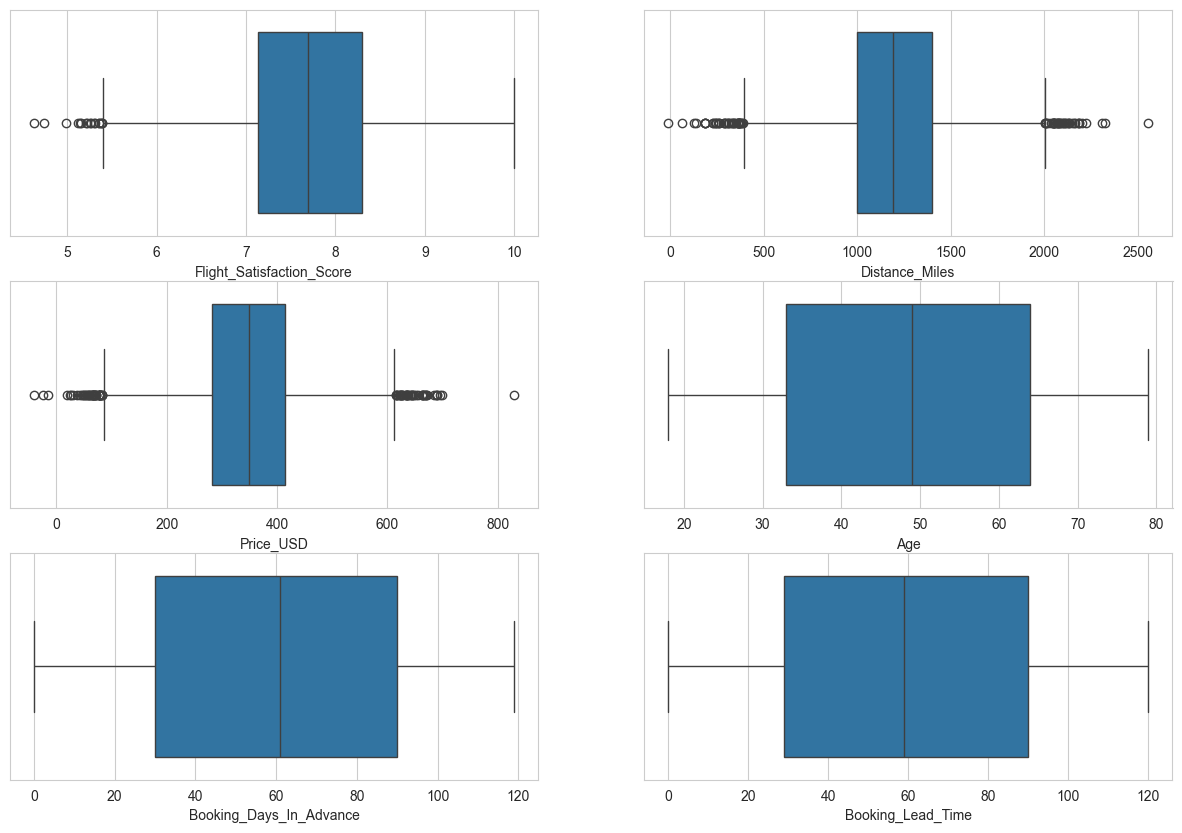

In [96]:
# 이상치 탐지 (boxplot)

sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
# 'Distance_Miles', 'Price_USD', 'Age'
sns.boxplot(ax=axes[0,0], x = 'Flight_Satisfaction_Score', data = df)
sns.boxplot(ax=axes[0,1], x = 'Distance_Miles', data = df)
sns.boxplot(ax=axes[1,0], x = 'Price_USD', data = df)
sns.boxplot(ax=axes[1,1], x = 'Age', data = df)
sns.boxplot(ax=axes[2,0], x = 'Booking_Days_In_Advance', data = df)
sns.boxplot(ax=axes[2,1], x = 'Booking_Lead_Time', data = df)

In [99]:
print('----왜도----\n', df[target].skew(), df[soochi].skew(), sep='\n\n')
print()
print('----첨도----\n', df[target].kurtosis(), df[soochi].kurtosis(), sep='\n\n')
# 수치형 이상값X

----왜도----


Flight_Satisfaction_Score    0.148888
dtype: float64

Distance_Miles             0.021857
Price_USD                  0.000083
Age                       -0.012769
Booking_Days_In_Advance   -0.013377
Booking_Lead_Time          0.018994
dtype: float64

----첨도----


Flight_Satisfaction_Score   -0.163934
dtype: float64

Distance_Miles             0.060614
Price_USD                  0.067216
Age                       -1.207908
Booking_Days_In_Advance   -1.200281
Booking_Lead_Time         -1.206049
dtype: float64


In [83]:
# 지연된 비행과 지연되지 않은 비행 확인
df['is_delayed'] = df['Delay_Minutes'].apply(lambda x:1 if x>5 else 0)  # 출발 시간이 5분 초과 늦춰지면 지연으로 분류
df['is_delayed'].value_counts(normalize=True)

is_delayed
1    0.5798
0    0.4202
Name: proportion, dtype: float64

<Axes: xlabel='Price_USD', ylabel='Count'>

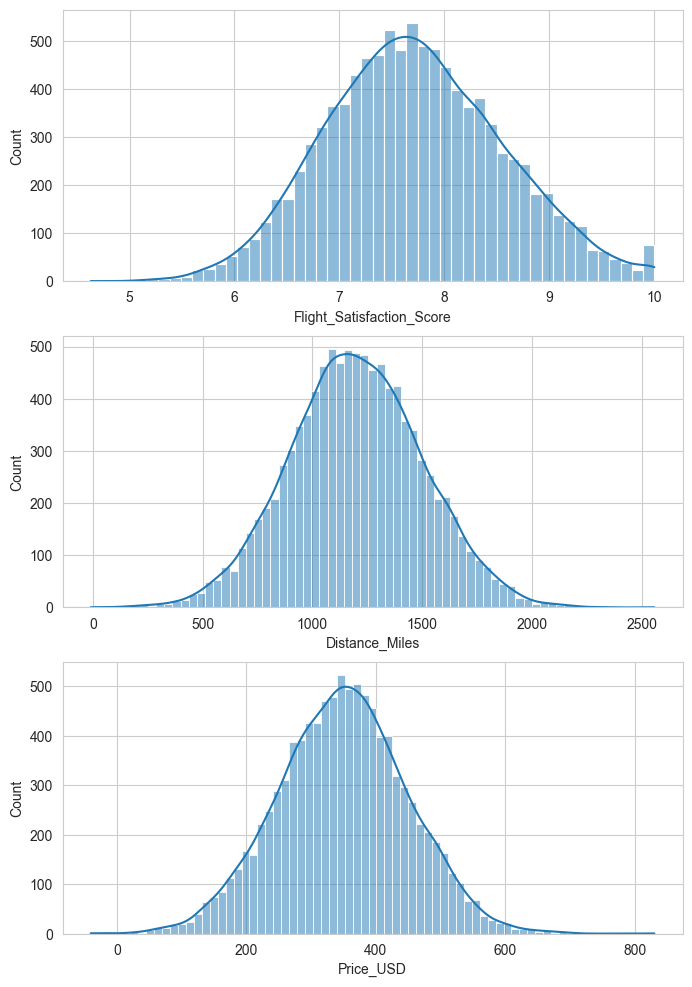

In [205]:
# 05. 변수 분포 시각화
# 연속형 변수 시각화

sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
# 'Distance_Miles', 'Price_USD', 'Age'
sns.histplot(ax=axes[0], x = 'Flight_Satisfaction_Score', data = df, kde=True)
sns.histplot(ax=axes[1], x = 'Distance_Miles', data = df, kde=True)
sns.histplot(ax=axes[2], x = 'Price_USD', data = df, kde=True)
# sns.histplot(ax=axes[1,1], x = 'Age', data = df, kde=True);

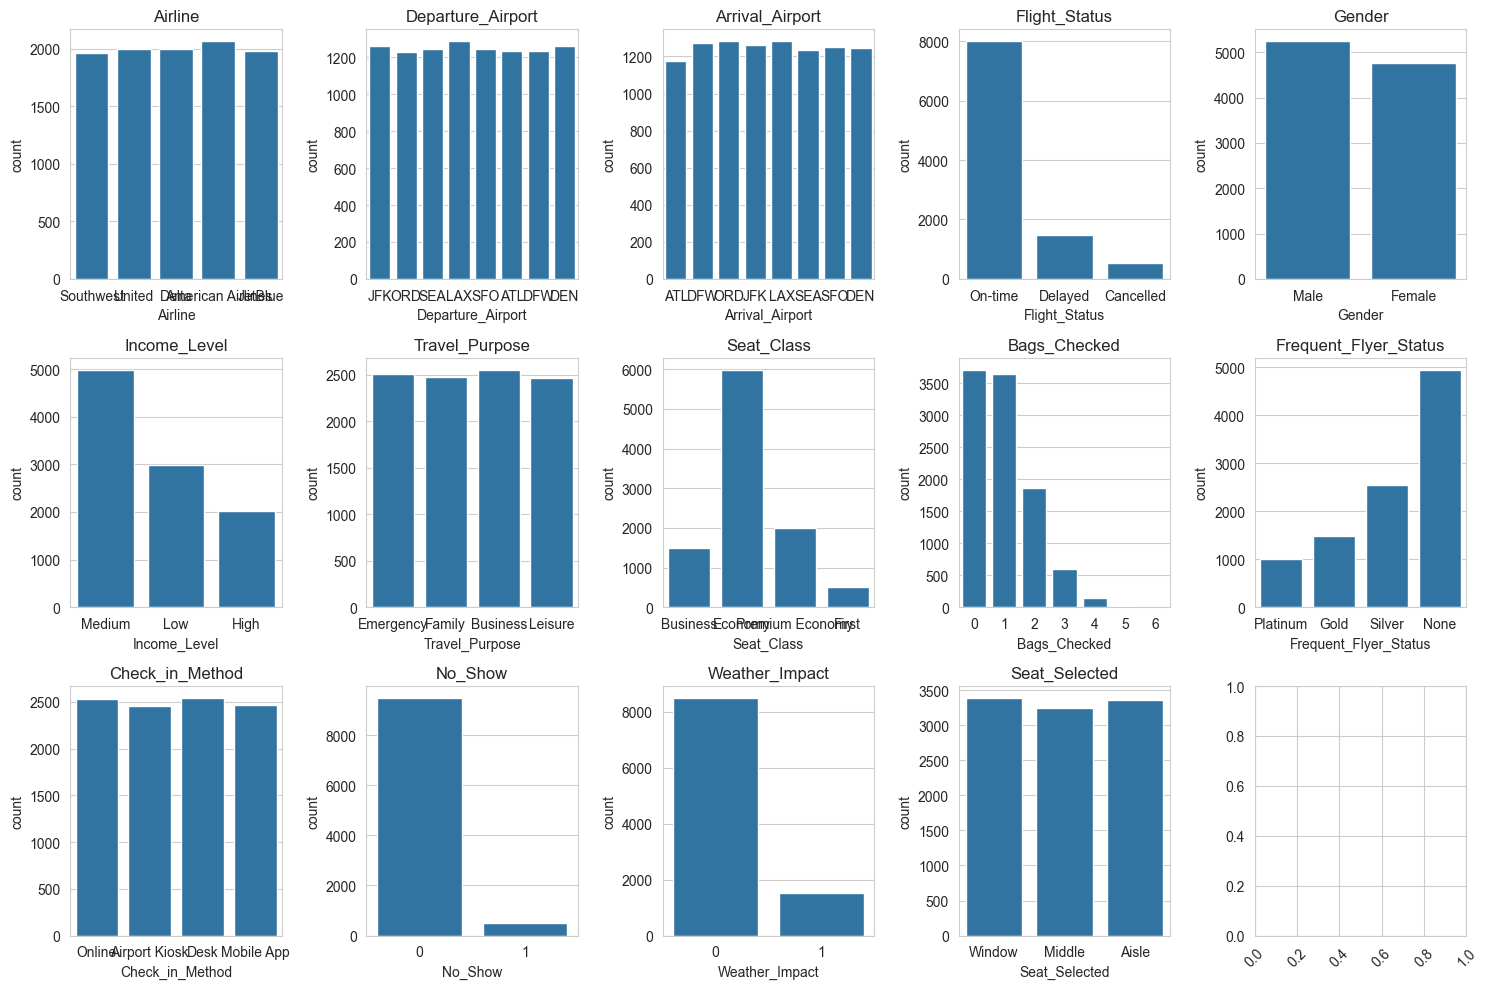

In [206]:
# 범주형 변수 시각화
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(bumzu):
    sns.countplot(x=col, ax=axes[idx], data=df)
    axes[idx].set_title(col)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [207]:
# 07. 상관관계 및 교차분석
sanggwan = ['Flight_Satisfaction_Score', 'Distance_Miles', 'Price_USD', 'Age']
round(df[sanggwan].corr(), 5)

,Flight_Satisfaction_Score,Distance_Miles,Price_USD,Age
Flight_Satisfaction_Score,1.00000,-0.00733,0.01524,0.00171
Distance_Miles,-0.00733,1.00000,-0.00311,0.01071
Price_USD,0.01524,-0.00311,1.00000,-0.01343
Age,0.00171,0.01071,-0.01343,1.00000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Passenger_ID               10000 non-null  object 
 1   Flight_ID                  10000 non-null  object 
 2   Airline                    10000 non-null  object 
 3   Departure_Airport          10000 non-null  object 
 4   Arrival_Airport            10000 non-null  object 
 5   Departure_Time             10000 non-null  object 
 6   Flight_Duration_Minutes    10000 non-null  int64  
 7   Flight_Status              10000 non-null  object 
 8   Distance_Miles             10000 non-null  int64  
 9   Price_USD                  10000 non-null  float64
 10  Age                        10000 non-null  int64  
 11  Gender                     10000 non-null  object 
 12  Income_Level               10000 non-null  object 
 13  Travel_Purpose             10000 non-null  obje

In [90]:
# 08. 데이터 전처리
# ID변수 제거
df.drop('Passenger_ID', axis=1, inplace=True)
df.drop('Flight_ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Airline                    10000 non-null  object 
 1   Departure_Airport          10000 non-null  object 
 2   Arrival_Airport            10000 non-null  object 
 3   Departure_Time             10000 non-null  object 
 4   Flight_Duration_Minutes    10000 non-null  int64  
 5   Flight_Status              10000 non-null  object 
 6   Distance_Miles             10000 non-null  int64  
 7   Price_USD                  10000 non-null  float64
 8   Age                        10000 non-null  int64  
 9   Gender                     10000 non-null  object 
 10  Income_Level               10000 non-null  object 
 11  Travel_Purpose             10000 non-null  object 
 12  Seat_Class                 10000 non-null  object 
 13  Bags_Checked               10000 non-null  int6

In [88]:
# 유일하게 관측되는 결측값, Frequent_flyer_Status의 결측값은 회원멤버십이 없다는 뜻의 None으로 대체
df['Frequent_Flyer_Status'].fillna('None', inplace=True)
df.isnull().sum()

Passenger_ID                 0
Flight_ID                    0
Airline                      0
Departure_Airport            0
Arrival_Airport              0
Departure_Time               0
Flight_Duration_Minutes      0
Flight_Status                0
Distance_Miles               0
Price_USD                    0
Age                          0
Gender                       0
Income_Level                 0
Travel_Purpose               0
Seat_Class                   0
Bags_Checked                 0
Frequent_Flyer_Status        0
Check_in_Method              0
Flight_Satisfaction_Score    0
Delay_Minutes                0
Booking_Days_In_Advance      0
No_Show                      0
Weather_Impact               0
Seat_Selected                0
Booking_Lead_Time            0
is_delayed                   0
dtype: int64

In [108]:
# 09. Feature Engineering
# 범주형 변수들 더미화
# 더미화 이전에 날려야 하는 컬럼들 먼저 날릴것!!!
df_dummies = pd.get_dummies(df[bumzu], columns=bumzu)

df1 = df_dummies.copy()

# 요 밑으로는 무시하세요
## ML 파트

In [134]:
med = df['Flight_Satisfaction_Score'].median()

b1 = df['Flight_Satisfaction_Score'] >= med
b0 = df['Flight_Satisfaction_Score'] < med

df.loc[b1, "SScore"] = 1
df.loc[b0, "SScore"] = 0

print(df['SScore'].value_counts())
target = df['SScore']
tt = df['Flight_Satisfaction_Score']

SScore
1.0    5000
0.0    5000
Name: count, dtype: int64


In [170]:
# 데이터 분할
X = df2
y = target
# y = tt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (8000, 26)
X_test shape: (2000, 26)


In [171]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',random_state=42,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.69237
Logreg Test set score:0.69150


In [172]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:0.72950
Random Forest Accuracy on test set:0.64800


In [173]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',random_state=42,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

GridSearchCV max accuracy:0.69213
GridSearchCV best parameter: {'solver': 'lbfgs'}


In [160]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))
print('절편', np.round(best_clf.intercept_, 3))
print('회귀계수', np.round(best_clf.coef_, 3))

Accuracy on test set:0.49050
절편 [-0.017]
회귀계수 [[-0.018 -0.049  0.035  0.012  0.02   0.015 -0.028  0.024  0.014 -0.013
  -0.025  0.008  0.006  0.005  0.015  0.06  -0.043 -0.036  0.103 -0.079
  -0.025 -0.014 -0.003  0.016 -0.05   0.049  0.046 -0.027 -0.02   0.024
  -0.047 -0.017  0.04 ]]


In [177]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(df2.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1

ValueError: Shape of passed values is (33, 1), indices imply (26, 1)

In [175]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기

feature_names = list(df1.columns)
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
Arrival_Airport_ORD,1.108
Arrival_Airport_DFW,1.062
Gender_Male,1.051
Income_Level_High,1.047
Travel_Purpose_Leisure,1.041
Airline_JetBlue,1.036
Departure_Airport_DFW,1.024
Travel_Purpose_Business,1.024
Airline_United,1.020
Flight_Status_On-time,1.016


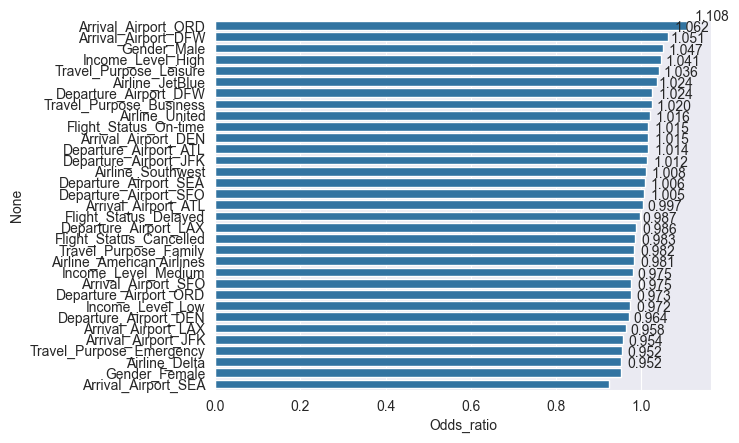

In [176]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),
                xytext=(5, 10), textcoords='offset points')

In [139]:
# 연속형 변수일 때 선형회귀
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set r2 score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set r2 score:0.28819
Linear Regression Test set r2 score:0.28397
